# E-Commerce Customer Churn Analysis

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### Loading Dataset

In [2]:
dt=pd.read_csv('C:\\Users\\ssaba\\Downloads\\ecom_data\\ecom_data.csv')

Viewing loaded Dataset

In [3]:
dt.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


#### Descriptive statistical analysis

In [4]:
dt.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


#### Data Cleaning

1.Checking for missing values in imported data

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


Returns column have some missing values compared to other columns.so, checking for number values missing in return column.

In [6]:
miss_returns=dt['Returns'].isnull().sum()
print(f'Number of values missing in Returns column : {miss_returns}')

Number of values missing in Returns column : 47596


Checking % of value missing in return column

In [7]:
miss_ret_percentage=(dt['Returns'].isnull().sum())/(dt['Returns'].count())*100
print(f'percentage of values missing in Returns column : {round(miss_ret_percentage)}%')

percentage of values missing in Returns column : 24%


Returns column is important for our analysis. we can go for imputation of missing values. 
As Returns column have categorical data. Imputing mode value of column to missing values is better choice for categorical variables.


Imputation of missing values in 'Returns' column

In [8]:
mod=dt['Returns'].mode()
print(f'Mode value for Returns Column: {mod[0]}')

Mode value for Returns Column: 0.0


In [9]:
dt['Returns']=dt['Returns'].fillna(mod[0])

Viewing the dataframe after imputation of mode value to Return column

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                250000 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


Mapping float values of Returns column to int type 

In [11]:
dt['Returns']=dt["Returns"].map({1.0:1,0.0:0})

Returns column in Dataframe after Mapping

In [12]:
dt.head(7)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0,James Grant,49,Female,1
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1,James Grant,49,Female,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0,James Grant,49,Female,1


#### Handling duplicate column and rows in Dataframe

Checking the presence of duplicate rows

In [13]:
print(f'Number of Duplicate Rows in our Dataframe: {dt.duplicated().sum()}')

Number of Duplicate Rows in our Dataframe: 0


Checking the presence of duplicate columns

In [14]:
dt.T.duplicated()

Customer ID              False
Purchase Date            False
Product Category         False
Product Price            False
Quantity                 False
Total Purchase Amount    False
Payment Method           False
Customer Age             False
Returns                  False
Customer Name            False
Age                       True
Gender                   False
Churn                    False
dtype: bool

Age column is duplicated in Dataframe. So, removing the Age column in Dataframe.

In [15]:
dt=dt.loc[:,~dt.T.duplicated()]

In [16]:
dt

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0,Christine Hernandez,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0,Christine Hernandez,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0,Christine Hernandez,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0,Christine Hernandez,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0,James Grant,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1,Michelle Flores,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1,Jeremy Rush,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0,Tina Craig,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0,Jennifer Cooper,Female,1


#### Handling of Outlier

Checking for outliers in Age and Total purchase amount column

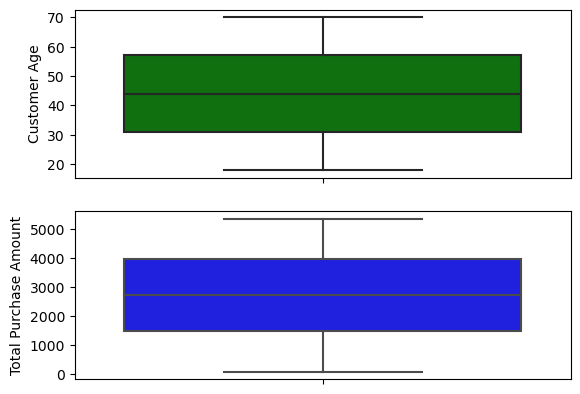

In [17]:
plt.subplot(2,1,1)
sns.boxplot(y=dt['Customer Age'],color='green')
plt.subplot(2,1,2)
sns.boxplot(y=dt['Total Purchase Amount'],color='b')
plt.show()

As per box plot, we can know that there is no outlier in Age and Total Purchase Amount column

Number of Customer left 

In [18]:
leftt=dt[dt['Churn']==1]['Customer ID'].unique()
print(f'Number of customers left: {leftt.size}')

Number of customers left: 9942


Total number of customers there in Data

In [19]:
ttl_cust=dt['Customer ID'].nunique()
print(f'Total number of customers there in given data : {ttl_cust}')

Total number of customers there in given data : 49673


Percentage of customer left

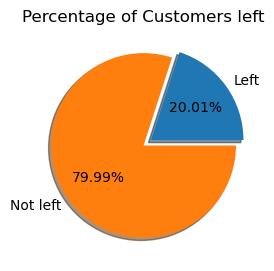

In [20]:
plt.figure(figsize=(3,3))
plt.pie([leftt.size,ttl_cust-leftt.size], labels=['Left','Not left'], autopct='%.2f%%',explode=[0.1,0],shadow=True)
plt.title('Percentage of Customers left')
plt.show()

In [21]:
cus_lt_per=round((leftt.size/ttl_cust)*100)
print('Percentage of customer left:{}%'.format(cus_lt_per))

Percentage of customer left:20%


In [22]:
ds=dt[dt["Churn"]==1]
ds=pd.crosstab(ds['Customer ID'],ds['Gender'])
f_lt=(ds['Female']!=0).sum()
m_lt=(ds['Male']!=0).sum()
print('Number of female customers left:',f_lt)
print('Number of male customers left:',m_lt)

Number of female customers left: 4926
Number of male customers left: 5016


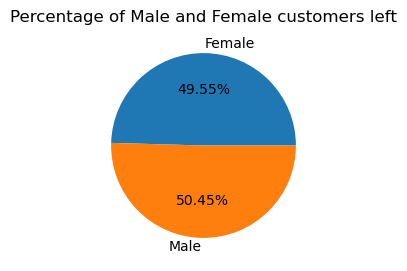

In [23]:
plt.figure(figsize=(3,3))
plt.pie([f_lt,m_lt], labels=['Female','Male'], autopct='%.2f%%')
plt.title('Percentage of Male and Female customers left')
plt.show()

Almost Equal percentage of Male and Female customers were left.

In [24]:
lt_mp=float((m_lt/leftt.size)*100)
lt_fp=float((f_lt/leftt.size)*100)
print('Percentage of male customers left: {:.2f}%'.format(lt_mp))
print('Percentage of female customers left: {:.2f}%'.format(lt_fp))

Percentage of male customers left: 50.45%
Percentage of female customers left: 49.55%


In [25]:
dt_lt=dt[dt['Churn']==1]

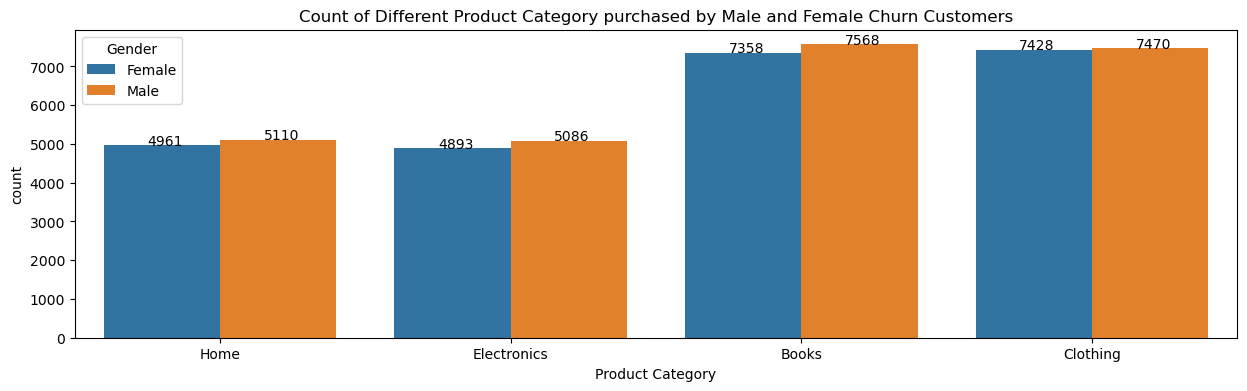

In [144]:
plt.figure(figsize=(15,4))
a=sns.countplot(data=dt_lt,x='Product Category',hue='Gender')
for h in a.patches:
    a.annotate('{:.0f}'.format(h.get_height()), (h.get_x()+0.15, h.get_height()+0.05))
plt.title('Count of Different Product Category purchased by Male and Female Churn Customers')
plt.show()

Left Customer mostly purchased Books and Clothings. 
So, introducing more offers in Books and Clothing Product Categories would be helpful to reduce the Customer Churn.

In [27]:
pm=dt_lt['Payment Method'].value_counts()
pm

Credit Card    20084
PayPal         14883
Cash            9981
Crypto          4926
Name: Payment Method, dtype: int64

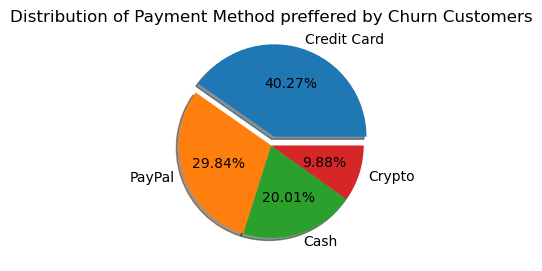

In [28]:
plt.figure(figsize=(3,3))
plt.pie(pm,labels=['Credit Card','PayPal','Cash','Crypto'],autopct='%.2f%%',explode=[0.1,0,0,0],shadow=True)
plt.title('Distribution of Payment Method preffered by Churn Customers')
plt.show()

Around 40 % credit card payment method is preferred by Churn Customers. 
So, we can provide them a cashback offers for credit card payments to reduce the Customer Churn rate.

In [86]:
cid=pd.Series(dt_lt['Customer ID'].unique())

In [96]:
def age_grouping(x):
    if x>=18 and x<=35:
        return 'Young-age-adult'
    elif x>=36 and x<=55:
        return 'Mid-age-adult'
    elif x>=56:
        return 'Old-age-adult'
        
dt_lt['Age Group']=dt_lt['Customer Age'].apply(age_grouping)
ag=pd.DataFrame({'Customer ID':cid})
ag['Age Group']=ag['Customer ID'].apply(lambda x:dt_lt[dt_lt['Customer ID']==x]['Age Group'].max())

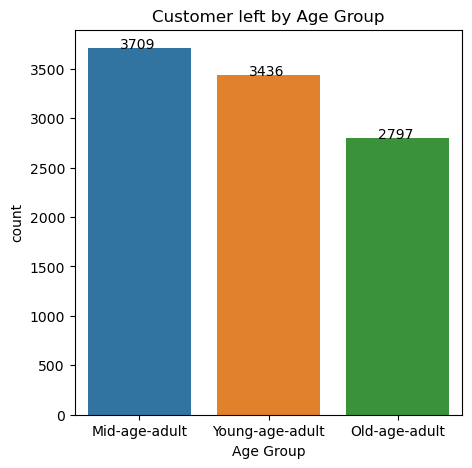

In [106]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=ag,x='Age Group')
plt.title('Customer left by Age Group')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.05))
plt.show()

Around 72 % of customers falls under young and mid-age-adult category was left compared to old-age-adult. so, focus can be given to young and mid age adult group to reduce the churn rate

In [97]:
m=[]
for j in cid:
    m.append(dt_lt[dt['Customer ID']==j]['Returns'].max())

In [107]:
nor=pd.Series(m)

In [165]:
ra=pd.DataFrame({'Customer ID':cid,'Returns':nor})
ra['Gender']=ra['Customer ID'].apply(lambda x:dt_lt[dt_lt['Customer ID']==x]['Gender'].max())

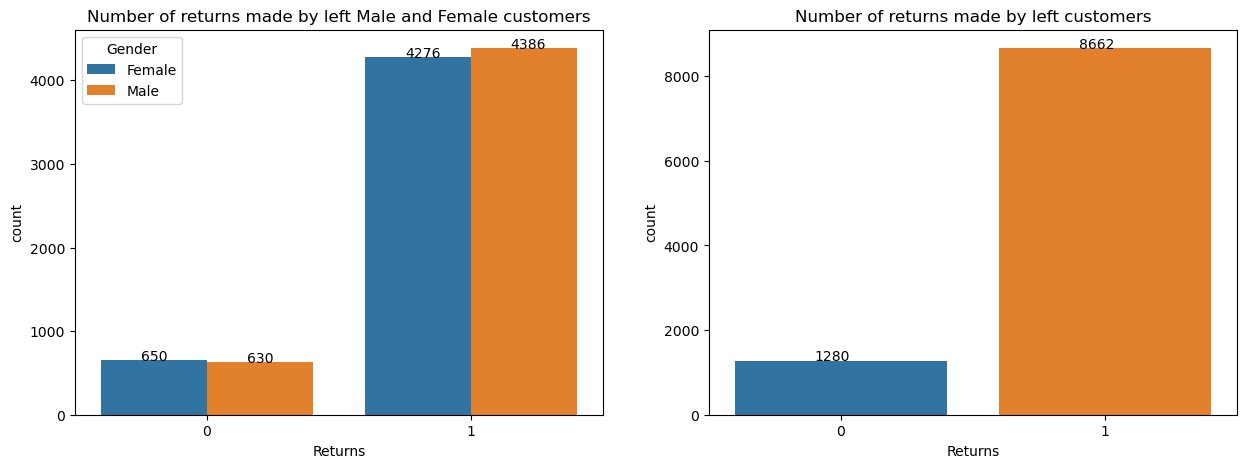

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Number of returns made by left Male and Female customers')
ax1=sns.countplot(data=ra,x='Returns',hue='Gender')
for t in ax1.patches:
    ax1.annotate('{:.0f}'.format(t.get_height()), (t.get_x()+0.15, t.get_height()+0.05))
plt.subplot(1,2,2)
ax2=sns.countplot(data=ra,x='Returns')
for u in ax2.patches:
    ax2.annotate('{:.0f}'.format(u.get_height()), (u.get_x()+0.30, u.get_height()+0.05))
plt.title('Number of returns made by left customers')
plt.show()

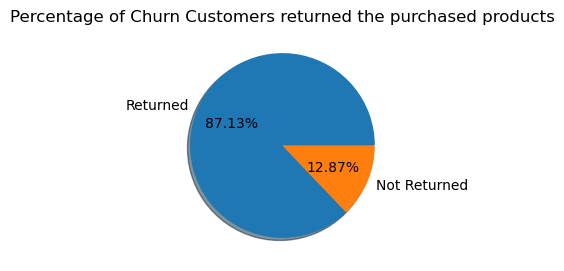

In [134]:
rt=ra['Returns'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(rt,labels=['Returned','Not Returned'],autopct='%.2f%%',shadow=True)
plt.title('Percentage of Churn Customers returned the purchased products')
plt.show()

Around 87% of churn customers returned their purchased product. so, we should focus on product quality and get feedback from customers to enhance customer statisfication on purchased product to reduce the customer churn rate.

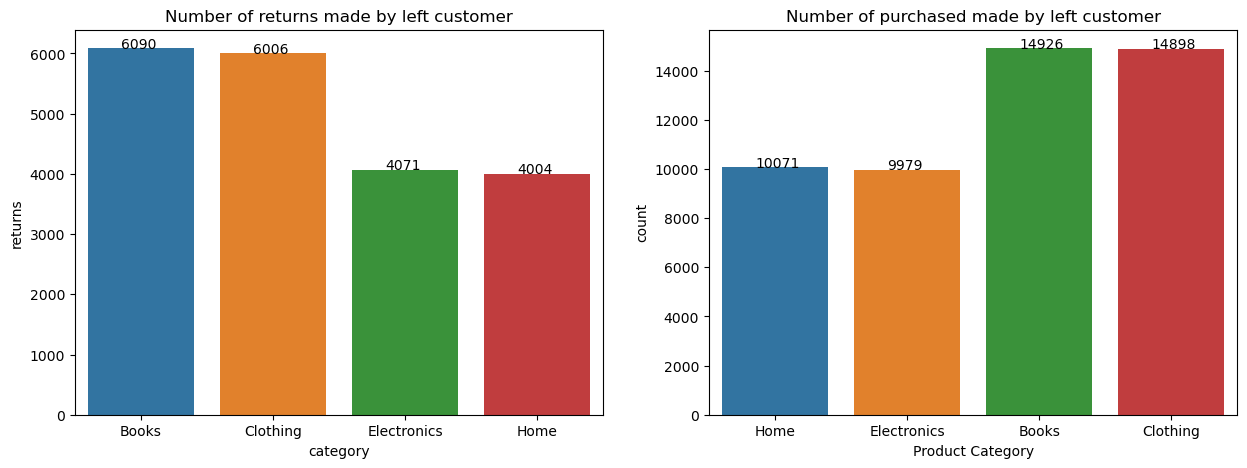

In [164]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Number of returns made by left customer')
ret=dt_lt.groupby('Product Category')['Returns'].sum()
ret=pd.DataFrame(dict(category=ret.index,returns=ret))
g=sns.barplot(data=ret,x='category',y='returns')
for t in g.patches:
    g.annotate('{:.0f}'.format(t.get_height()), (t.get_x()+0.25, t.get_height()+0.05))
plt.subplot(1,2,2)
plt.title('Number of purchased made by left customer')
fx=sns.countplot(data=dt_lt,x='Product Category')
for t in fx.patches:
    fx.annotate('{:.0f}'.format(t.get_height()), (t.get_x()+0.25, t.get_height()+0.05))
plt.show()

Customers who have left have mostly purchased items from the Books and Clothing categories and have returned more items from the same category. This obviously implies that in order to reduce the churn rate, quality and customer satisfaction should be prioritized in the books and clothing product categories.

---------------------------------------------------------END--------------------------------------------------------------------